In [1]:
from google.colab import drive

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)    

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
cd /content/drive/My\ Drive/Masters/Deep\ Learning/model_evaluator/

/content/drive/My Drive/Masters/Deep Learning/model_evaluator


In [3]:
ls

model_evaluator/


In [4]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
import cv2

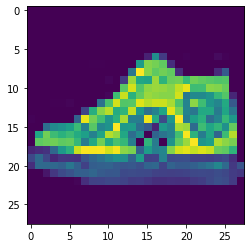

In [6]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

In [0]:
#building a network
from torch import nn,optim
import torch.nn.functional as F
import datetime

In [28]:
len(trainloader)

938

In [0]:
def train_model(epochs,train_loader,model,criterion,optimizer,model_name,device = 'cpu',print_time_stats=True):
  model_architecture = {'model':model,'optimizer':optimizer,'critierion':criterion}
  data = {'train_set':trainset}
  training_parameters = {'no_of_steps_per_epoch':len(train_loader),'device':device,'epochs':epochs,'time':datetime.datetime.now()}
  training_stats = {'total_train_time':None,'epoch_time':[],'epoch_average_batch_loss':[]}
  model_dict = {model_name:{'model_architecture':model_architecture,'data':data,'training_parameters':training_parameters,'training_stats':training_stats}}

  print(model_dict)

  train_start_time = datetime.datetime.now()
  model.train()
  for e in range(epochs):
    epoch_start_time = datetime.datetime.now()
    running_loss = 0
    for images,labels in train_loader:
      if device != 'cpu':
        images, labels = images.cuda(),labels.cuda()
      images = images.view(-1,28*28)
      optimizer.zero_grad()
      output = model(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
    print(f"Average Loss per Batch : {running_loss/len(train_loader)}")
    model_dict[model_name]['training_stats']['epoch_average_batch_loss'].append(running_loss.item()/len(train_loader))
    epoch_end_time = datetime.datetime.now()
    model_dict[model_name]['training_stats']['epoch_time'].append(str(epoch_end_time - epoch_start_time))
    if print_time_stats:
      print(f"Epoch Time : {epoch_end_time - epoch_start_time}")
  train_end_time = datetime.datetime.now()
  model_dict[model_name]['training_stats']['total_train_time'] = str(train_end_time - train_start_time)
  if print_time_stats:
    print(f"Training Time : {str(train_end_time - train_start_time)}")
  return model_dict

In [79]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,32),
                    nn.ReLU(),
                    nn.Linear(32,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)
model_train_dict = train_model(5,trainloader,model,criterion,optimizer,'fashion_mnist_2')

{'fashion_mnist_2': {'model_architecture': {'model': Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax()
), 'optimizer': Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
), 'critierion': NLLLoss()}, 'data': {'train_set': Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )}, 'training_parameters': {'no_of_steps_per_epoch': 938, 'device': 'cpu', 'epochs': 5, 'time': datetime.datetime(2020, 5, 9, 17, 12, 1, 693226)}, 'training_stats': {'total_train_time': None, 'epoch_time': [], 'epoch_average_batch_loss': []}}}
Average Loss per Batch : 0.50460481

In [0]:
model
%config IPCompleter.greedy=True

# Model Evaluator Class

TODO:

1. Add model_training_class which stores the model_state_dict
2. Add methods to store and retrive the information
3. Add methods to print the information
4. Add methods to visualize between the models

In [0]:
import torch

In [0]:
class ModelEvaluator:
  def __init__(self,dataset,file_path):
    self.dataset = dataset
    self.file_path = file_path
    try:
      self.models = torch.load(file_path)
    except FileNotFoundError:
      self.models = []
  def load_model(self):
    try:
      self.models = torch.load(self.file_path)
      print("Model Successfully loaded")
    except:
      print("Model Dict Not Found")
    
  def add_model(self,model):
    if model in self.models:
      pass
      print('model already exists')
    else:
        self.models.append(model)
        torch.save(self.models,self.file_path)

  
      

In [0]:
path = "/content/drive/My Drive/Masters/Deep Learning/model_evaluator/model_evaluator/fashion_mnist_test.pkl"
fashion_mnist = ModelEvaluator('fashion_mnist',path)